In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mental_health_workplace_survey.csv')
df.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


## Finding the number of null values in each row.

In [3]:
df.isnull().sum()

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

There are no missing values.

In [9]:
df.info(max_cols= None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

In [14]:
df["Gender"].unique()

array(['Male', 'Non-binary', 'Prefer not to say', 'Female'], dtype=object)

In [13]:
df["RemoteWork"].unique()

array(['No', 'Hybrid', 'Yes'], dtype=object)

In [18]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col, df[col].unique())

Gender ['Male' 'Non-binary' 'Prefer not to say' 'Female']
Country ['UK' 'Germany' 'India' 'Australia' 'Brazil' 'USA' 'Canada']
JobRole ['Sales Associate' 'Software Engineer' 'IT Admin' 'HR Specialist'
 'Customer Support' 'Project Manager' 'Marketing Manager' 'Data Scientist']
Department ['HR' 'IT' 'Support' 'Engineering' 'Marketing' 'Sales']
RemoteWork ['No' 'Hybrid' 'Yes']
HasMentalHealthSupport ['No' 'Yes']
HasTherapyAccess ['Yes' 'No']
SalaryRange ['40K-60K' '80K-100K' '60K-80K' '<40K' '100K+']


There are no spelling mistakes or different formats of data in the cols

## Dealing with outliers
values below 25% - 1.5 * IQR and above 75% + 1.5 * IQR are being considered as outliers.

In [36]:
numerical_cols = []
for col in df.columns:
    if df[col].dtype != "object":
        numerical_cols.append(col)

df[numerical_cols].shape

(3000, 17)

In [37]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    df = df[(df[col] >= q1 - 1.5 * iqr) & (df[col] <= q3 + 1.5 * iqr)]

df[numerical_cols].shape

(3000, 17)

There are no outliers

<Axes: xlabel='Gender', ylabel='BurnoutLevel'>

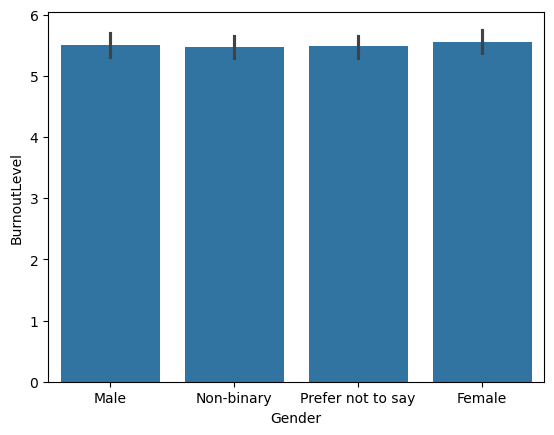

In [44]:
import seaborn as sns
sns.barplot(data=df, x="Gender", y="BurnoutLevel")

<Axes: xlabel='WorkHoursPerWeek', ylabel='BurnoutLevel'>

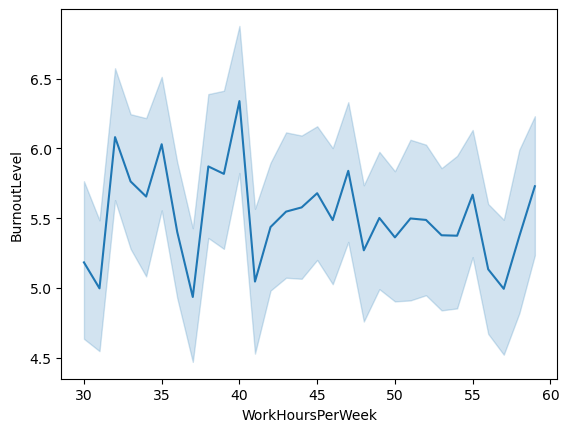

In [45]:
sns.lineplot(data=df, x="WorkHoursPerWeek", y="BurnoutLevel")

<Axes: xlabel='BurnoutLevel', ylabel='Country'>

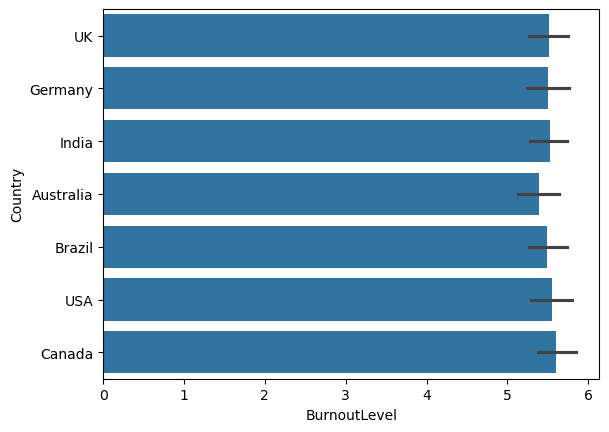

In [46]:
sns.barplot(data=df, x="BurnoutLevel", y="Country")

<Axes: xlabel='BurnoutLevel', ylabel='JobSatisfaction'>

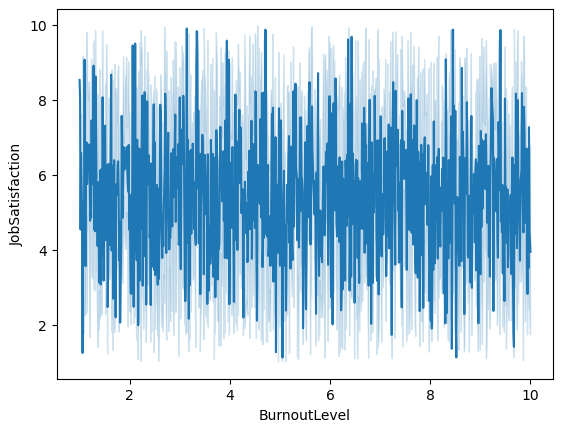

In [ ]:
sns.lineplot(data=df, x="BurnoutLevel", y="JobSatisfaction", )

<Axes: xlabel='StressLevel', ylabel='SleepHours'>

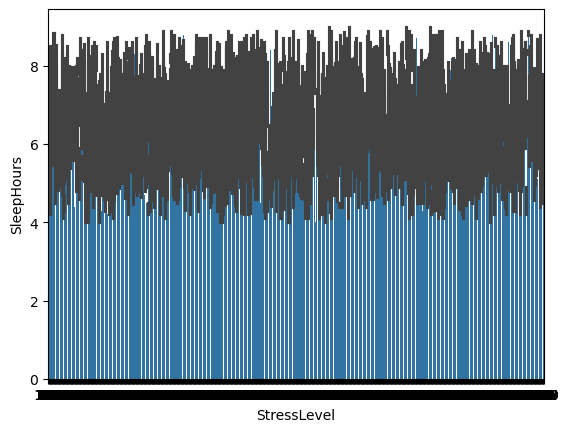

In [50]:
sns.barplot(data=df, x="StressLevel", y="SleepHours")